# 载入读取jacquard数据

- by 刘道会
- 2020-10于重庆大学

## 1.查看数据存放结构

In [1]:
import os
import glob

origin_path = os.getcwd()

jacquard_path = '../jacquard'

os.chdir(jacquard_path)
os.listdir()

['Jacquard_Dataset_0',
 'Jacquard_Dataset_0.zip',
 'Jacquard_Dataset_1',
 'Jacquard_Dataset_1.zip',
 'Jacquard_Dataset_10',
 'Jacquard_Dataset_11',
 'Jacquard_Dataset_2',
 'Jacquard_Dataset_2.zip',
 'Jacquard_Dataset_3',
 'Jacquard_Dataset_3.zip',
 'Jacquard_Dataset_4',
 'Jacquard_Dataset_4.zip',
 'Jacquard_Dataset_5',
 'Jacquard_Dataset_5.zip',
 'Jacquard_Dataset_6',
 'Jacquard_Dataset_7',
 'Jacquard_Dataset_8',
 'Jacquard_Dataset_9']

可以看到，数据集分成了11份，每份在一个独立的文件夹里面，可以先进入其中一个文件夹，打印一下数据看一下存放的格式

In [2]:
os.chdir('../jacquard/Jacquard_Dataset_0')
files = os.listdir()

In [3]:
print(files)

['1a0312faac503f7dc2c1a442b53fa053', '1a03376343b2e4f0c27d3c9a6f742a5e', '1a0710af081df737c50a037462bade42', '1a10ecfcaac04c882d17d82c03b66', '1a1ec1cfe633adcdebbf11b1629fc16a', '1a2a5a06ce083786581bb5a25b17bed6', '1a30adabf5a2bb848af30108ea9ccb6c', '1a3390d95465117bd54eac0dba08442d', '1a3efcaaf8db9957a010c31b9816f48b', '1a4216ac5ffbf1e89c7ce4b816b39bd0', '1a43be52de26834898d5fc0473d00a1c', '1a46011ef7d2230785b479b317175b55', '1a477f7b2c1799e1b728e6e715c3f8cf', '1a4daa4904bb4a0949684e7f0bb99f9c', '1a4ec387ea6820345778775dfd5ca46a', '1a5327b328cd97d084c3569473be6c23', '1a595fd7e7043a06b0d7b0d4230df8ca', '1a597353e92979be111bae0faf1067a8', '1a5a12839c48724153250612ca93852', '1a5e21a5633e1134ebd90840d80c9784', '1a5f561ce4cbca2625c70fb1df3f879b', '1a622b84abb294515dbd53c7c10cfe76', '1a62b83f912f6edb2d6a698a89d341f2', '1a667ee35c2c38ae4b7b270d94b7f3c7', '1a6960ddfdd323ec494dc7b475c330b5', '1a6a520652aa2244146fa8a09fad6c38', '1a6a67905880e4911a4d5e0a785b0e03', '1a8d161d93764a8996cba1a88ab596

可以看到，里面有很多个文件夹，名字像是随机命的，看一下有多少个文件

In [4]:
print(len(files))

1000


刚好1000个，看了其它的数据文件夹也是，每个文件夹下都有1000个子文件夹，也就是1000个对象，这些子文件夹里面存放的就是一个个对象的具体数据

In [5]:
os.chdir(files[0])
os.listdir()

['0_1a0312faac503f7dc2c1a442b53fa053_grasps.txt',
 '0_1a0312faac503f7dc2c1a442b53fa053_mask.png',
 '0_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff',
 '0_1a0312faac503f7dc2c1a442b53fa053_RGB.png',
 '0_1a0312faac503f7dc2c1a442b53fa053_stereo_depth - 副本.tiff',
 '0_1a0312faac503f7dc2c1a442b53fa053_stereo_depth.tiff',
 '1_1a0312faac503f7dc2c1a442b53fa053_grasps.txt',
 '1_1a0312faac503f7dc2c1a442b53fa053_mask.png',
 '1_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff',
 '1_1a0312faac503f7dc2c1a442b53fa053_RGB.png',
 '1_1a0312faac503f7dc2c1a442b53fa053_stereo_depth.tiff',
 '2_1a0312faac503f7dc2c1a442b53fa053_grasps.txt',
 '2_1a0312faac503f7dc2c1a442b53fa053_mask.png',
 '2_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff',
 '2_1a0312faac503f7dc2c1a442b53fa053_RGB.png',
 '2_1a0312faac503f7dc2c1a442b53fa053_stereo_depth.tiff',
 '3_1a0312faac503f7dc2c1a442b53fa053_grasps.txt',
 '3_1a0312faac503f7dc2c1a442b53fa053_mask.png',
 '3_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff',
 '

本级文件夹下的数据都是属于同一对象，但是是不同的视角和姿态，每种姿态的全部信息保存在5个文件夹下：
存储某个姿态的五个文件及含义如下：

| 命名规则          | 含义 | 
| ---------       | ------------ 
|_grasps.txt        |抓取位置点|
|_mask.png         |目标蒙版|
|_perfect_depth.tiff  |深度图|
|_RGB.png         |目标RGB图|
|_stereo_depth.tiff   |立体深度图|

开头的数字代表不同的姿态编号，比如上面这个文件夹打开，开头的编号从0到4，说明这一个物体有五种不同的姿态，我现在的想法是，最开始训练的时候，其实就可以把这五种全部读入，当作五种不同的物体来不加什么特殊处理直接运算就行了。

> **注意：** 经测试，每个对象都是有多个姿态的，3-5个不等，且编号也没有规律（比如，有三个姿态的话，编号不一定是0，1，2，也有可能是1，3，4），也就是说我们不能像cornell那样，按照0_**_grasps.txt的规则去读出所有的对象，然后就直接按照固定的命名规则来构建其他文件的路径了。不过也不麻烦，按照各个编号来搜索，再按照编号来构建就行了。

In [6]:
os.chdir(origin_path)
graspf = []
for i in range(5):
    each_graspf = glob.glob(os.path.join(jacquard_path,'*','*','{0}_*_grasps.txt'.format(i)))
    print(len(each_graspf))
    graspf.extend(each_graspf)

10930
10907
10882
10910
10856


In [7]:
#或者下面这样更简单粗暴
graspf = []
graspf = glob.glob(os.path.join(jacquard_path,'*','*','*_grasps.txt'))

In [8]:
print(len(graspf))
print('\n'.join(graspf[0:10]))

54485
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\0_1a0312faac503f7dc2c1a442b53fa053_grasps.txt
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\1_1a0312faac503f7dc2c1a442b53fa053_grasps.txt
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\2_1a0312faac503f7dc2c1a442b53fa053_grasps.txt
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\3_1a0312faac503f7dc2c1a442b53fa053_grasps.txt
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\4_1a0312faac503f7dc2c1a442b53fa053_grasps.txt
../jacquard\Jacquard_Dataset_0\1a03376343b2e4f0c27d3c9a6f742a5e\0_1a03376343b2e4f0c27d3c9a6f742a5e_grasps.txt
../jacquard\Jacquard_Dataset_0\1a03376343b2e4f0c27d3c9a6f742a5e\1_1a03376343b2e4f0c27d3c9a6f742a5e_grasps.txt
../jacquard\Jacquard_Dataset_0\1a03376343b2e4f0c27d3c9a6f742a5e\2_1a03376343b2e4f0c27d3c9a6f742a5e_grasps.txt
../jacquard\Jacquard_Dataset_0\1a03376343b2e4f0c27d3c9a6f742a5e\3_1a03376343b2e4f0c27d3c9a6f742a5e_grasps.txt
../j

有个小问题注意一下，现在11619个数据，理论上讲上面的读入应该都是11619的，但实际上看，都是10100左右，应该是后期他们人工剔除了一些不好的数据，这个没关系的

In [9]:
maskf = [grasp.replace('grasps.txt','mask.png') for grasp in graspf]
perfectf = [grasp.replace('grasps.txt','perfect_depth.tiff') for grasp in graspf]
rgbf = [grasp.replace('grasps.txt','RGB.png') for grasp in graspf]
stereof = [grasp.replace('grasps.txt','stereo_depth.tiff') for grasp in graspf]

In [10]:
print('\n'.join(maskf[0:5]))
print('\n'.join(perfectf[0:5]))
print('\n'.join(rgbf[0:5]))
print('\n'.join(stereof[0:5]))

../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\0_1a0312faac503f7dc2c1a442b53fa053_mask.png
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\1_1a0312faac503f7dc2c1a442b53fa053_mask.png
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\2_1a0312faac503f7dc2c1a442b53fa053_mask.png
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\3_1a0312faac503f7dc2c1a442b53fa053_mask.png
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\4_1a0312faac503f7dc2c1a442b53fa053_mask.png
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\0_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\1_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\2_1a0312faac503f7dc2c1a442b53fa053_perfect_depth.tiff
../jacquard\Jacquard_Dataset_0\1a0312faac503f7dc2c1a442b53fa053\3_1a0312faac503f7dc2c1a442b53fa053_perfect

可视化看一下各个图片

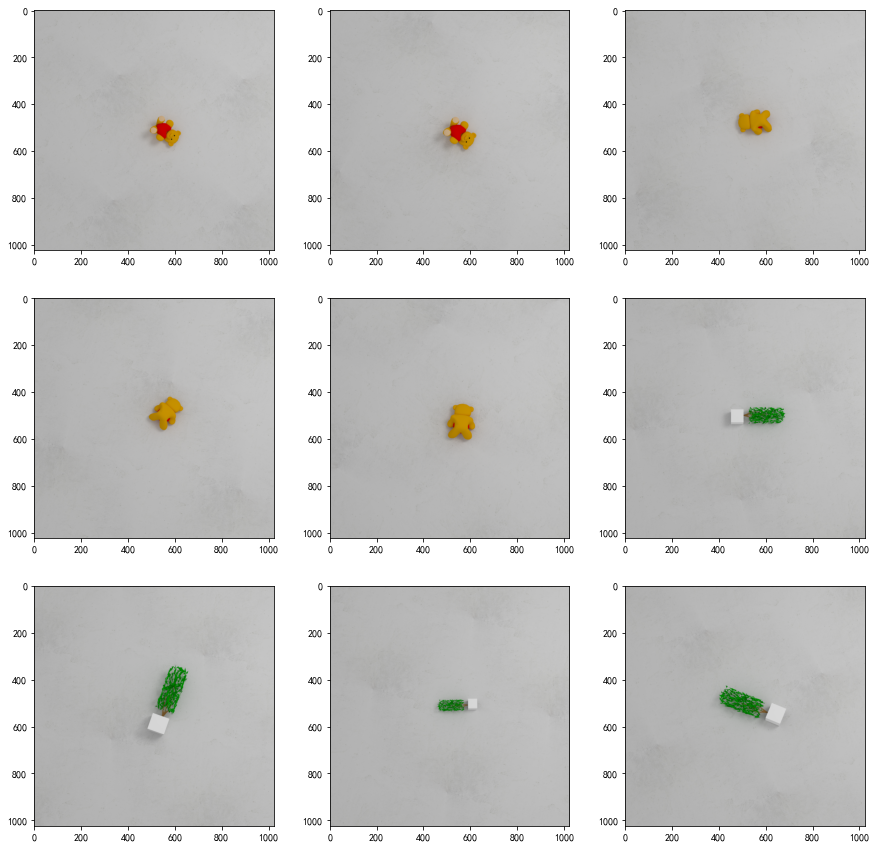

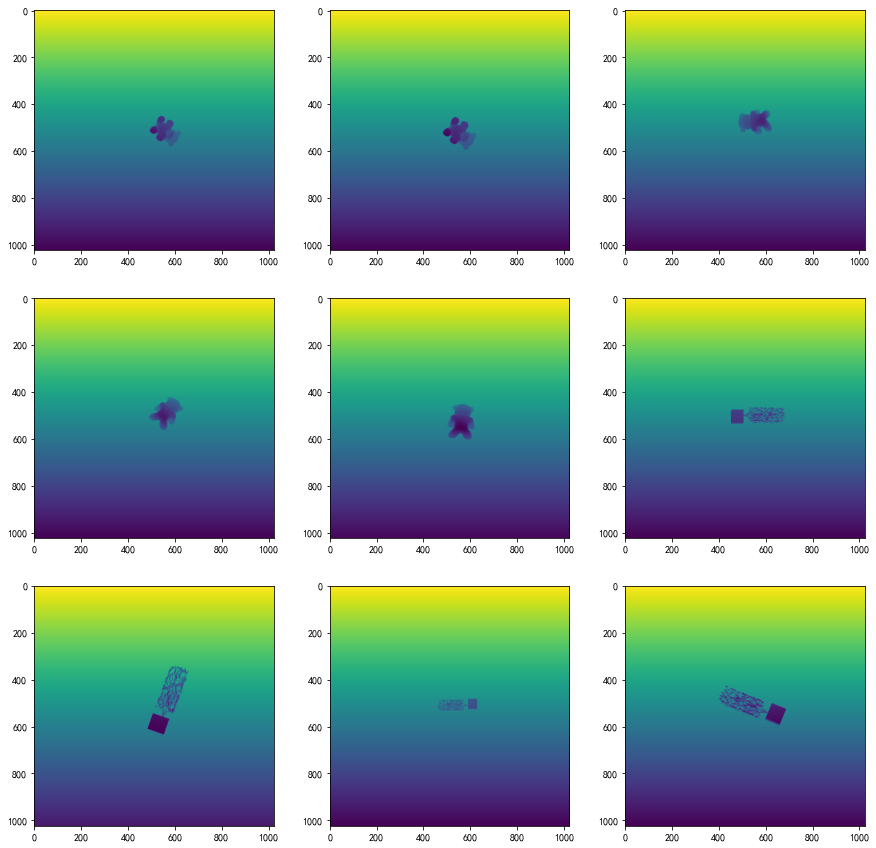

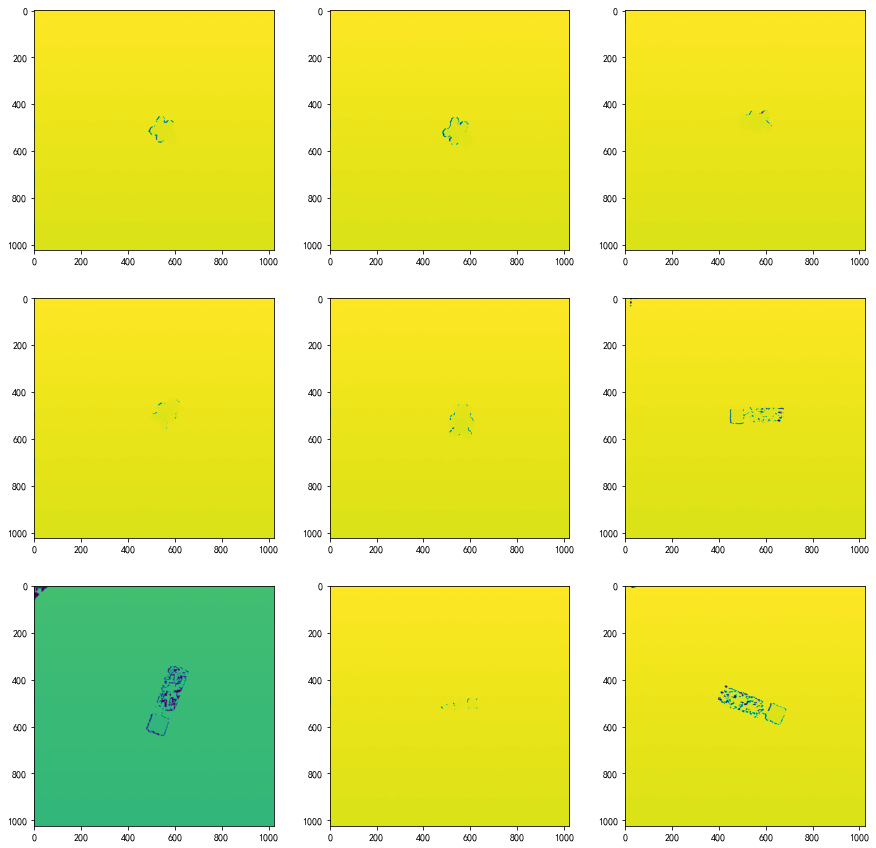

In [11]:
#这个16位的tiff图像用PIL的Image搞不定了，所以就直接拿数据集读取里面的imread来读
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

#解决matplotlib中文乱码
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(15,15))
for i in range(9):
    img = imread(rgbf[i])
    plt.subplot(331+i)
    plt.imshow(img)#这里把opencv读入的BGR通道转换回来成为RGB通道
plt.show()
plt.figure(figsize=(15,15))
for i in range(9):
    img = imread(perfectf[i])
    plt.subplot(331+i)
    plt.imshow(img)
plt.show()
plt.figure(figsize=(15,15))
for i in range(9):
    img = imread(stereof[i])
    plt.subplot(331+i)
    plt.imshow(img)
plt.show()

通过上面的可视化可以看出，两个深度图中效果比较好的是perfect_depth，ggcnn中也是用这个来处理，所以我们也就用这个了，所以后面的命名可以这样来写

In [13]:
graspf = graspf
rgbf = rgbf
depthf = perfectf

## 4.抓取框读取的适配
前面初步看，图像的基本读取和显示都是没问题的，而进一步的处理需要抓取框的一些参数，所以就先做抓取框的一个适配。

In [14]:
data = open(graspf[0]).read()
print(data)

560.71179;478.66529;20.3318;106.5;25.0316
560.71179;478.66529;20.3318;106.5;37.5475
560.71179;478.66529;20.3318;106.5;75.0956
529.4131;525.12629;29.7876;115.5;25.9784
529.4131;525.12629;29.7876;115.5;38.9677
529.4131;525.12629;29.7876;115.5;51.957
519.85175;507.35295;67.8191;46.5;26.4042
519.85175;507.35295;67.8191;46.5;52.8084
525.14786;527.8648;51.2724;111.0;25.7265
525.14786;527.8648;51.2724;111.0;12.8632
525.14786;527.8648;51.2724;111.0;38.5898
525.14786;527.8648;51.2724;111.0;77.1798
512.00989;511.48207;51.2724;48.0;26.3414
512.00989;511.48207;51.2724;48.0;39.5122
512.00989;511.48207;51.2724;48.0;79.0246
557.65044;480.26439;38.8413;106.5;25.1784
557.65044;480.26439;38.8413;106.5;37.7676
557.65044;480.26439;38.8413;106.5;75.5356
509.85699;513.94507;26.6199;46.5;26.1932
509.85699;513.94507;26.6199;46.5;52.3865
509.85699;513.94507;26.6199;46.5;78.5803
545.10829;469.67659;35.2477;55.5;26.038
545.10829;469.67659;35.2477;55.5;39.0571
545.10829;469.67659;35.2477;55.5;52.0762
545.10829;46

这个数据的存放就是和cornell的不一样的，可以看到每行数据都有五条，被四个分号分隔，这其实就是一个抓取框，从左到右代表的依次是：x, y, theta, w, h。
以第一行数据为例

|含义  |起始点x坐标|起始点y坐标|与水平夹角|张开宽度|手指宽度|
| ---- |----------|---------|-------|-----|-------|
|  值  | 560.71179|478.66529|20.3318|106.5|25.0316| 

所以载入点数据构建抓取对象时有些不一样，直接给Grasps类写一个load_from_jacquard()函数即可

In [15]:
from grasp_pro import Grasp_cpaw
from image_pro import Image,DepthImage
def load_from_jacquard(file_dir):
    '''
    功能:从原始的jacquard的grasps文件中提取所有的标注框有效信息，将其逐个构建成为Grasp对象，最后放到一个列表里面成为Grasps对象
    '''
    grs = []
    with open(file_dir) as f:
        for line in f:
            x, y, theta, w, h = [float(v) for v in line[:-1].split(';')]
            grs.append(Grasp_cpaw(np.array([x,y]),-theta/180.0*np.pi,h,w).as_gr)
    return grs

In [16]:
grs = load_from_jacquard(graspf[0])
grs[0].points

array([[515.128157  , 448.42723198],
       [614.99280612, 485.43131092],
       [606.295423  , 508.90334802],
       [506.43077388, 471.89926908]])

In [17]:
print(len(grs))

134


可以看到，就这一个对象，它就生成标注了134个抓取框，下面将框画到对象上面去，看效果对不对

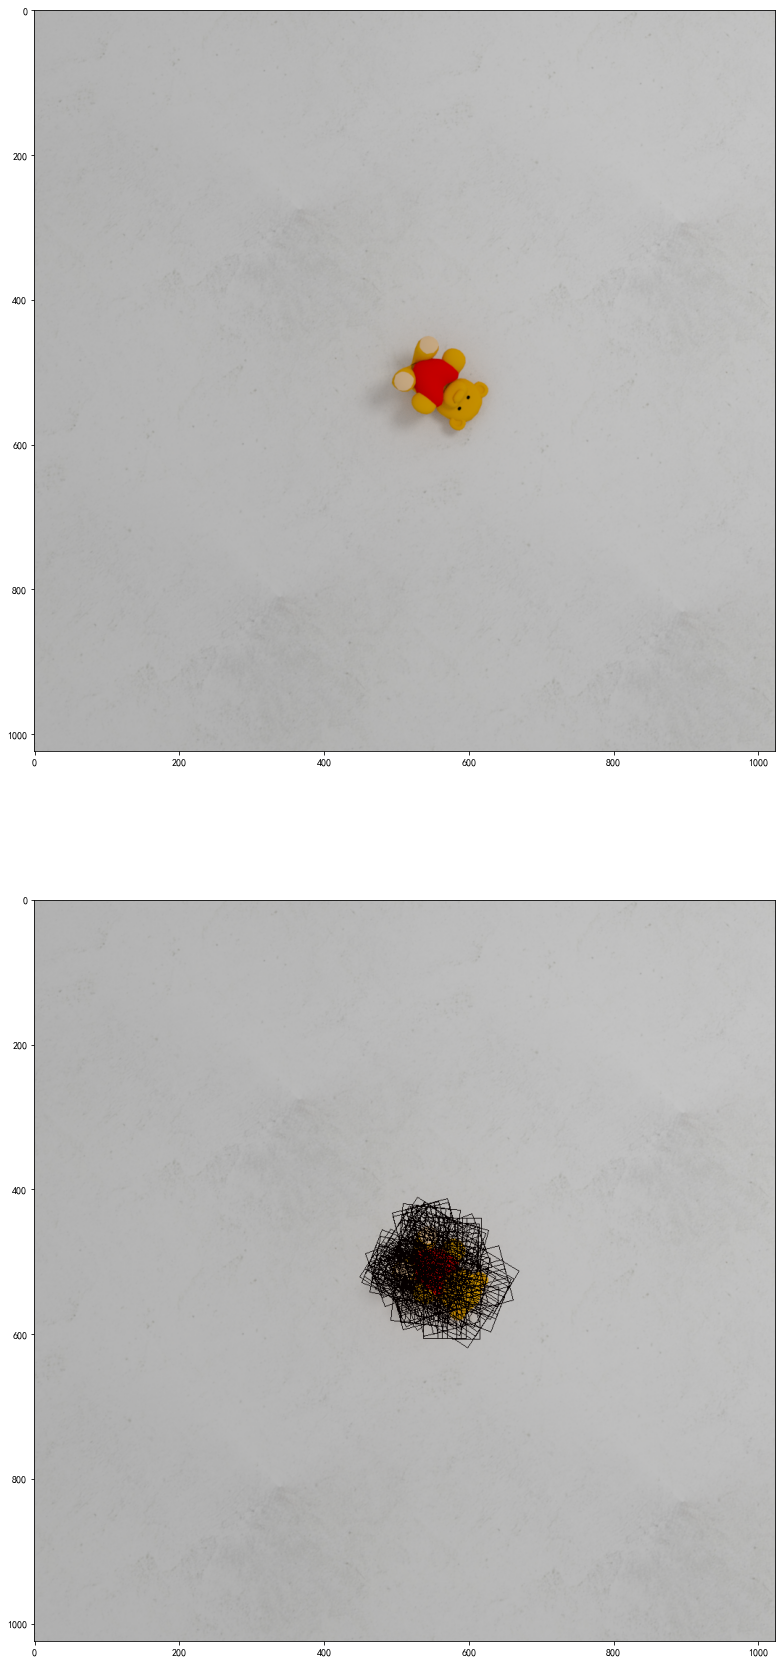

In [20]:
import cv2
rgb_img = Image.from_file(rgbf[0])

plt.figure(figsize = (15,30))
plt.subplot(211)
plt.imshow(rgb_img.img)
for gr in grs[::]:
    for i in range(3):
        cv2.line(rgb_img.img,tuple(gr.points.astype(np.uint32)[i]),tuple(gr.points.astype(np.uint32)[i+1]),5)
    rgb_img.img = cv2.line(rgb_img.img,tuple(gr.points.astype(np.uint32)[3]),tuple(gr.points.astype(np.uint32)[0]),5) 
plt.subplot(212)
plt.imshow(rgb_img.img)
plt.show()

现在已经写到grasp_pro里面去了，直接调用一下试试

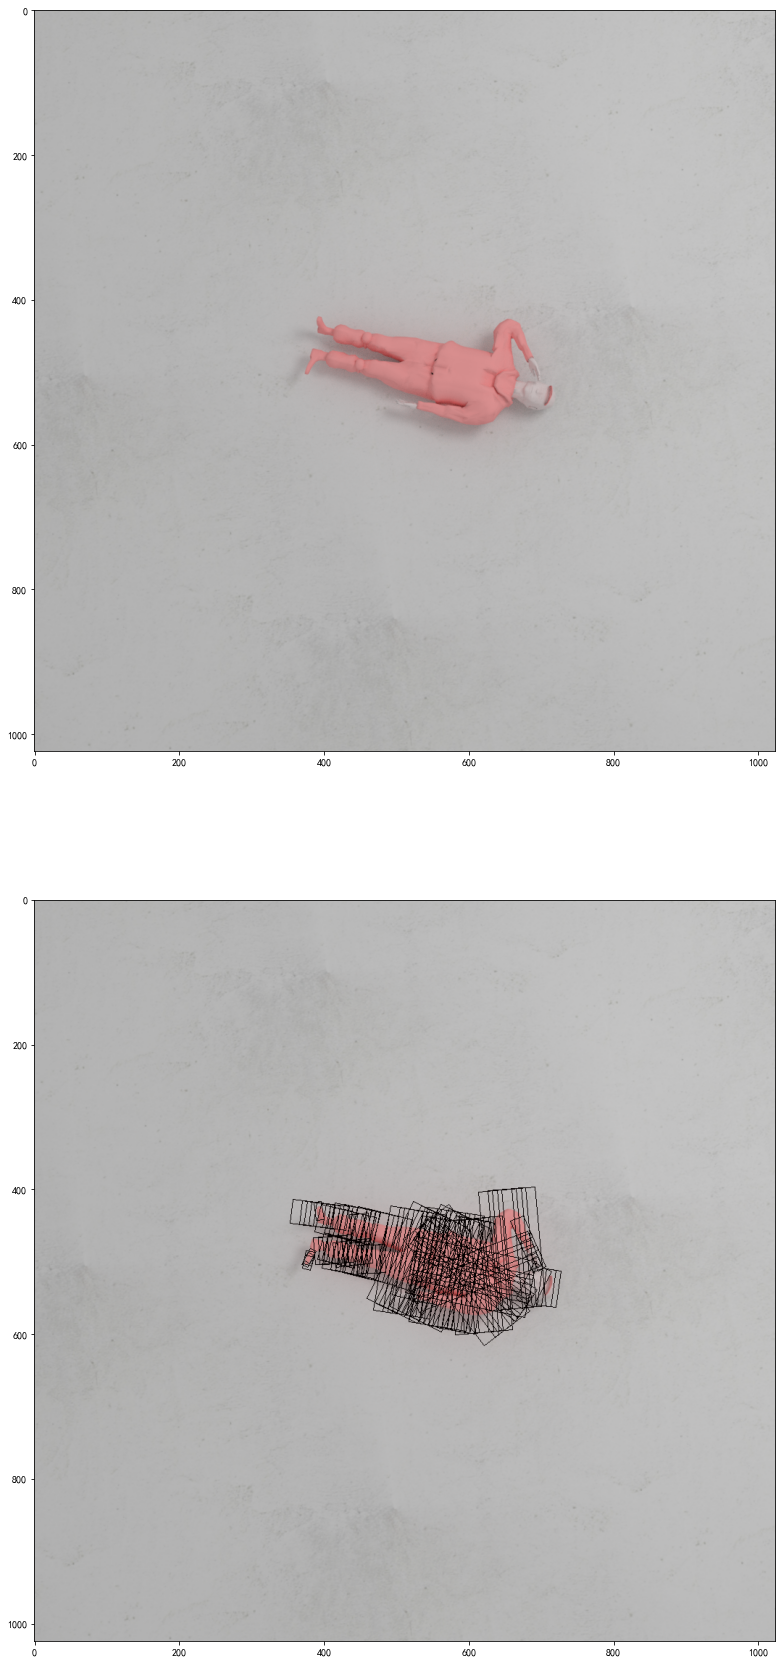

In [21]:
from grasp_pro import Grasps

idx = 10

grs = Grasps.load_from_jacquard_files(graspf[idx])

rgb_img = Image.from_file(rgbf[idx])

plt.figure(figsize = (15,30))
plt.subplot(211)
plt.imshow(rgb_img.img)
for gr in grs.grs[::]:
    for i in range(3):
        cv2.line(rgb_img.img,tuple(gr.points.astype(np.uint32)[i]),tuple(gr.points.astype(np.uint32)[i+1]),5)
    rgb_img.img = cv2.line(rgb_img.img,tuple(gr.points.astype(np.uint32)[3]),tuple(gr.points.astype(np.uint32)[0]),5) 
plt.subplot(212)
plt.imshow(rgb_img.img)
plt.show()

## 3.图像读取类的适配

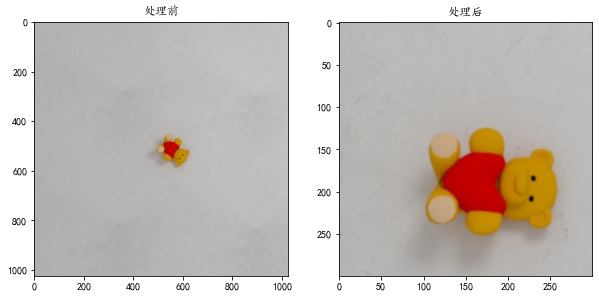

In [22]:
idx = 0
def show(idx,output_size = 300,rotate = 0.57,zoom = 0.8):
    grs = Grasps.load_from_jacquard_files(graspf[idx])
    img = Image.from_file(rgbf[idx])
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.title('处理前')
    plt.imshow(img.img)
    output_size = output_size
    #计算一些图像处理需要的参数
    center = grs.grs[0].center
    left = max(0, min(center[0] - output_size // 2, 1024 - output_size))
    top = max(0, min(center[1] - output_size // 2, 1024 - output_size))

    #图像处理
    img.rotate(rotate,center)
    img.crop((left,top),(left+output_size,top+output_size))
    img.zoom(0.8)
    #显示图像
    plt.subplot(122)
    plt.title('处理后')
    plt.imshow(img.img)
    plt.show()
show(idx = 0)

可以看到，图像类的各个功能都是正常工作的，看似没有问题，但后面的实验发现， 由于Jacquard数据集里的图大小是$1024\times1024$的，所以有些比较大的物体，直接裁剪成300会有问题，只能看到物体的局部（原图当然是没问题的），比如下面这样。

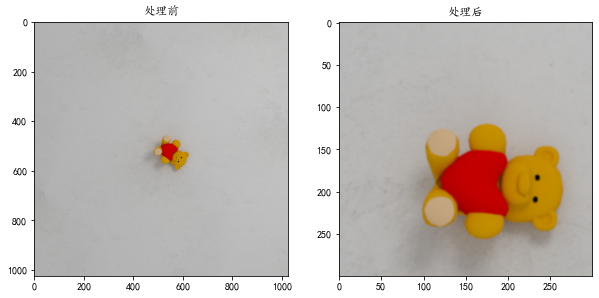

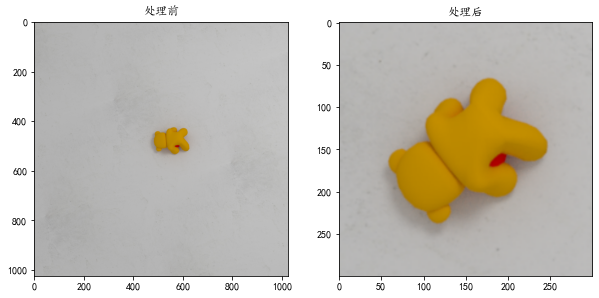

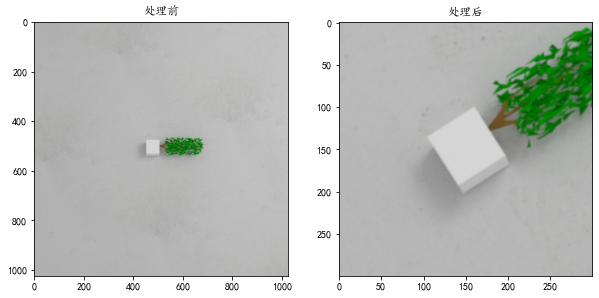

In [24]:
show(1)
show(2)
show(5)

这样肯定是不行的，不过把outputsize设置大一点就没问题了，比如下面这样

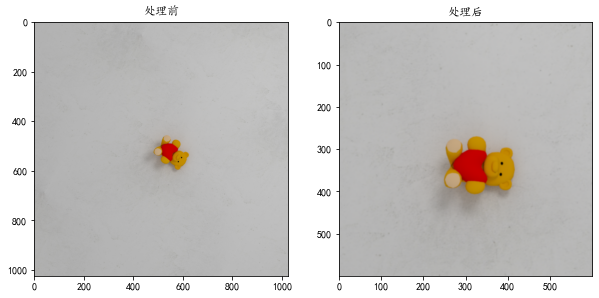

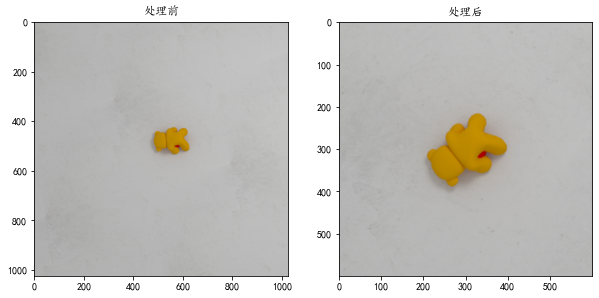

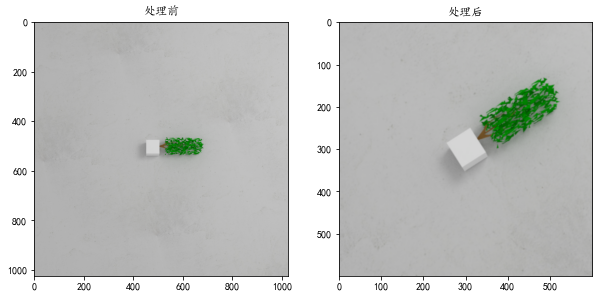

In [25]:
show(1,output_size = 600)
show(2,output_size = 600)
show(5,output_size = 600)

这就可以一定程度上缓解这个问题，但是最终我们就是要裁剪出来300$\times$300的图像才好输入给网络，而且对于一些比较大的目标，裁剪还是不行，所以仿照ggcnn中的写法，直接就不裁剪了，因为它对象尺度差异过大，小目标的背景信息多也是没有办法的事，没法裁，直接resize得了。所以把show函数改成下面这样：

In [26]:
def show(idx,output_size = 300,rotate = 0.57,zoom = 0.8):
    grs = Grasps.load_from_jacquard_files(graspf[idx])
    img = Image.from_file(rgbf[idx])
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.title('处理前')
    plt.imshow(img.img)
    output_size = output_size
    #计算一些图像处理需要的参数
    center = grs.grs[0].center
    #图像处理
    img.rotate(rotate,center)
    img.zoom(zoom)
    img.resize((output_size,output_size))
    #显示图像
    plt.subplot(122)
    plt.title('处理后')
    plt.imshow(img.img)
    plt.show()

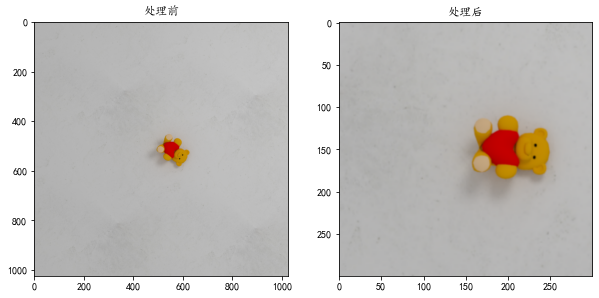

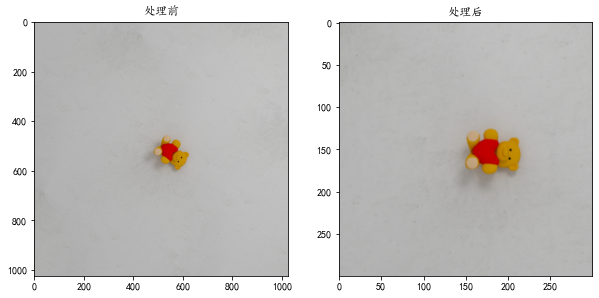

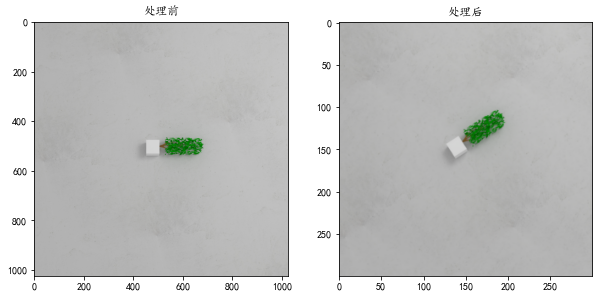

In [27]:
show(0,zoom = 0.4)
show(1,zoom = 0.6)
show(5,zoom = 0.9)

所以后面主要要更改的就三处：
- 1.完成jacquard数据集类的原始数据读取部分，改个命名规则就行了
- 2.修改get_rgb,get_depth两个图像数据读取函数
- 3.修改grasp_pro,get_grasp,确保抓取的标注信息和变换后的图像数据保持一致

### 第一个问题直接就在py文件里面改好了，不拿过来了，太长了 
已经写好了，拿过来测试一下

In [28]:
from jacquard import Jacquard

dataset = Jacquard('../jacquard')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


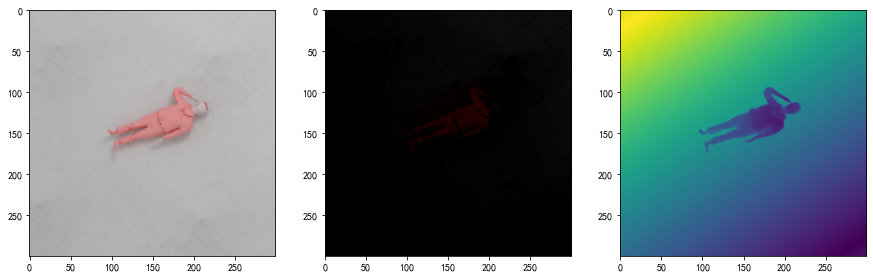

In [33]:
#先测试一下图像读取这里
plt.figure(figsize = (15,15))
idx = 10
rot = 0.57
zoom = 0.8
plt.subplot(131)
img = dataset.get_rgb(idx,rot = rot,zoom = zoom,normalise = False)
plt.imshow(img)
plt.subplot(132)
img = dataset.get_rgb(idx,rot = rot,zoom = zoom)
plt.imshow(img)
plt.subplot(133)
img = dataset.get_depth(idx,rot = rot,zoom = zoom)
plt.imshow(img)

plt.show()

初步看上去没啥问题

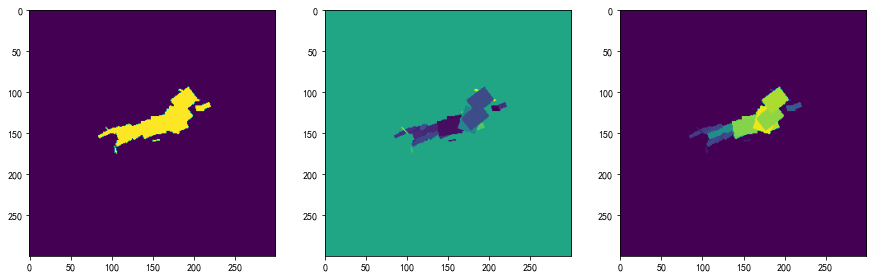

In [32]:
#再测试一下抓取框这里
plt.figure(figsize = (15,15))
rot = 0.57
zoom = 0.8

pos_img,angle_img,width_img  = dataset.get_grasp(idx,rot = rot,zoom = zoom)
plt.subplot(131)
plt.imshow(pos_img)
plt.subplot(132)
plt.imshow(angle_img)
plt.subplot(133)
plt.imshow(width_img)

plt.show()